# Housing Price Prediction

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

### The company is looking at prospective properties to buy to enter the market.

### The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

# Step 1 : Reading and Understanding the Data.

In [1]:
#importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.shape

(1460, 81)

In [5]:
data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 2 : Data Cleaning

In [7]:
#Checking null values in categorical columns

data.select_dtypes(include="object").isnull().sum()[data.select_dtypes(include="object").isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#Replace NA with None in following columns below:

for col in ("Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"):
    data[col] = data[col].fillna("None")

### Removing Categorical attributes that have more than 85% data associated to one value.

-  Removing columns that have the same value repeating 1241 times (1241/1450)*100 = 85% as this column will be skewed to one value.

In [9]:
# Dropping column that have more than 85% data associated to one value.

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = data.select_dtypes(include = ["object"])
    for col in (categorical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()
columnsToBeRemoved

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [10]:
#Remove columns with skewed data
data.drop(columnsToBeRemoved, axis = 1, inplace = True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [11]:
#Checking null values in categorical columns

data.select_dtypes(include="object").isnull().sum()[data.select_dtypes(include="object").isnull().sum()>0]

Series([], dtype: int64)

We can see that there are no null values present in Categorical Attributes.

In [12]:
# Now removing null values in Numerical Attributes.

data.select_dtypes(include=["int64", "float"]).isnull().sum()[data.select_dtypes(include=["int64", "float"]).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
#imputing Null values with median values

data["LotFrontage"] = data["LotFrontage"].replace(np.nan, data["LotFrontage"].median())
data["MasVnrArea"] = data["MasVnrArea"].replace(np.nan, data["MasVnrArea"].median())

In [14]:
#imputing all null values in GarageYrBlt as 0 for now

data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)
data["GarageYrBlt"] = data["GarageYrBlt"].astype(int)

#### Creating new column "IsRemodelled" - This column would determine wheather the house has been remodelled or not based on difference between "YearBuilt" and "YearRemodAdd".

In [15]:
#Creating new column named IsRemodelled 

def CheckForRemodel(row):
    if(row["YearBuilt"] == row["YearRemodAdd"]):
        return 0
    elif(row["YearBuilt"] < row["YearRemodAdd"]):
        return 1
    else:
        return 2
    
data["IsRemodelled"] = data.apply(CheckForRemodel, axis = 1)
data.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


#### Creating new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

In [16]:
#Creating a new column named BuiltOrRemodelledAge

def GetBuiltOrRemodelledAge(row):
    if(row["YearBuilt"] == row["YearRemodAdd"]):
        return row["YrSold"] - row["YearBuilt"]
    else:
        return row["YrSold"] - row["YearRemodAdd"]
    
data["BuiltOrRemodelledAge"] = data.apply(GetBuiltOrRemodelledAge, axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelledAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


#### Creating  new column which would indicate if the Garage is old or new, Garage Yr Built less than 2000 will be considered as old (0) else new(1). 

In [17]:

# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def GetGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
data['OldOrNewGarage'] = data['GarageYrBlt'].apply(GetGarageConstructionPeriod)
data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


#### Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we would only be using the derived columns for further analysis.

In [18]:
#Dropping YearBuilt, YearRemodAdd, YrSold and GarageYrBlt

data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

### Removing Numerical attributes that have more than 85% data associated to one value.

-  Removing columns that have the same value repeating 1241 times (1241/1450)*100 = 85% as this column will be skewed to one value.

In [19]:
# Dropping column that have more than 85% data associated to one value.

def GetHighNumericalValueCounts():
    column = []
    numerical_columns = data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = GetHighNumericalValueCounts()
data.drop(columnsToBeRemoved, axis = 1, inplace = True)



#### We will also drop MoSold as we will not be using that for further analysis.


In [20]:
data.drop(['MoSold'], axis = 1, inplace = True)
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [21]:
data.isnull().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
LotShape                0
LotConfig               0
Neighborhood            0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
RoofStyle               0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
Foundation              0
BsmtQual                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtUnfSF               0
TotalBsmtSF             0
HeatingQC               0
1stFlrSF                0
2ndFlrSF                0
GrLivArea               0
BsmtFullBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenQual             0
TotRmsAbvGrd            0
Fireplaces              0
FireplaceQu             0
GarageType              0
GarageFinish

In [22]:
data.isnull().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
LotShape                0
LotConfig               0
Neighborhood            0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
RoofStyle               0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
Foundation              0
BsmtQual                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtUnfSF               0
TotalBsmtSF             0
HeatingQC               0
1stFlrSF                0
2ndFlrSF                0
GrLivArea               0
BsmtFullBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenQual             0
TotRmsAbvGrd            0
Fireplaces              0
FireplaceQu             0
GarageType              0
GarageFinish

#### Checking for Duplicate Values.

In [23]:
#Check for Duplicate Values

data[data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelledAge,OldOrNewGarage


We can see that there are no duplicate values.

#### Outlier Treatment

In [24]:
# Checking outliers at 25%,50%,75%,90%,95% and above

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelledAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


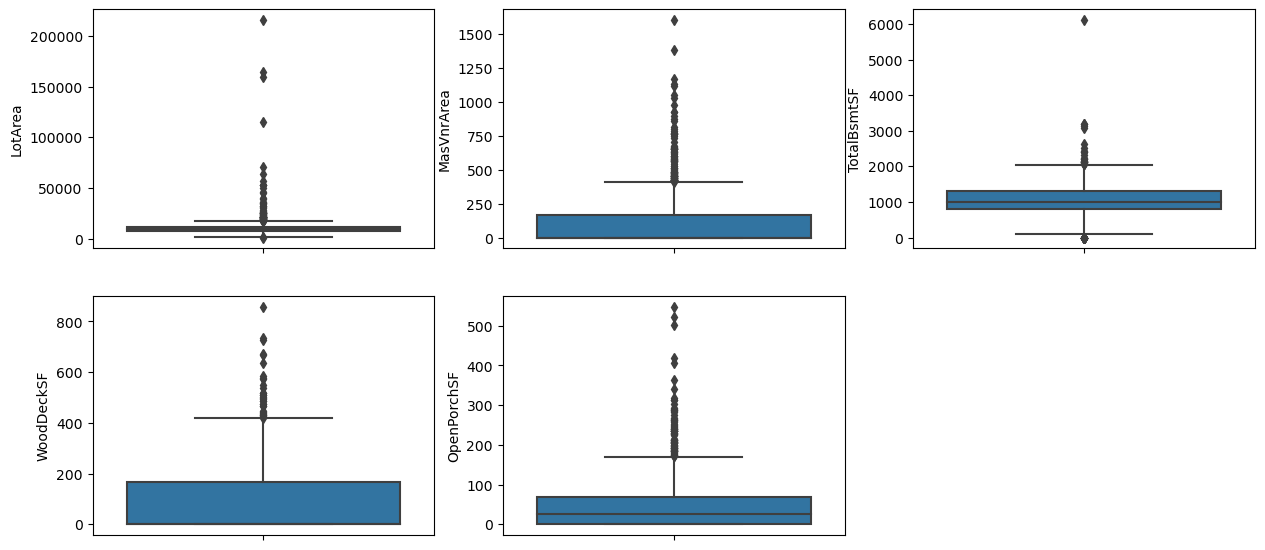

In [25]:
#Visualizing Outliers in Numerical Attributes using Subplots

plt.figure(figsize=(15, 18))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = data)
plt.show()

In [26]:
# Removing values beyond 98% for LotArea

quartile_LotArea = data['LotArea'].quantile(0.98)
data = data[data["LotArea"] < quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

quartile_MasVnrArea = data['MasVnrArea'].quantile(0.98)
data = data[data["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

quartile_TotalBsmtSF = data['TotalBsmtSF'].quantile(0.99)
data = data[data["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

quartile_WoodDeckSF = data['WoodDeckSF'].quantile(0.99)
data = data[data["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

quartile_OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < quartile_OpenPorchSF]

# Step 3 : Data Visualization

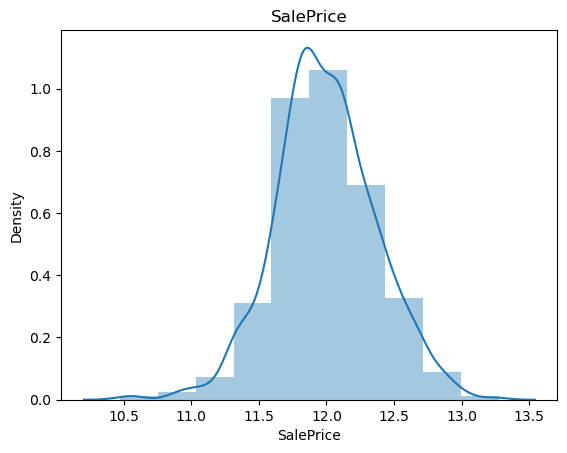

In [27]:
#Visualizing the target variable

data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

<Figure size 1000x500 with 0 Axes>

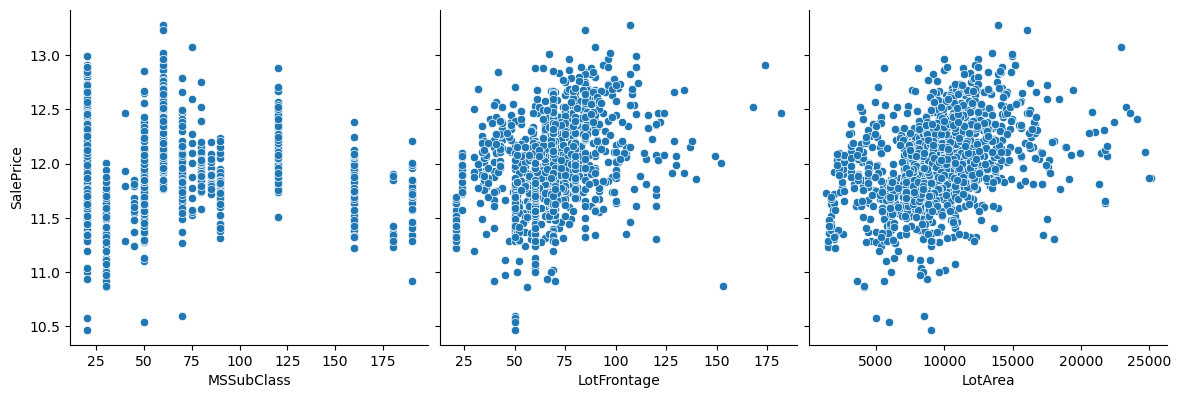

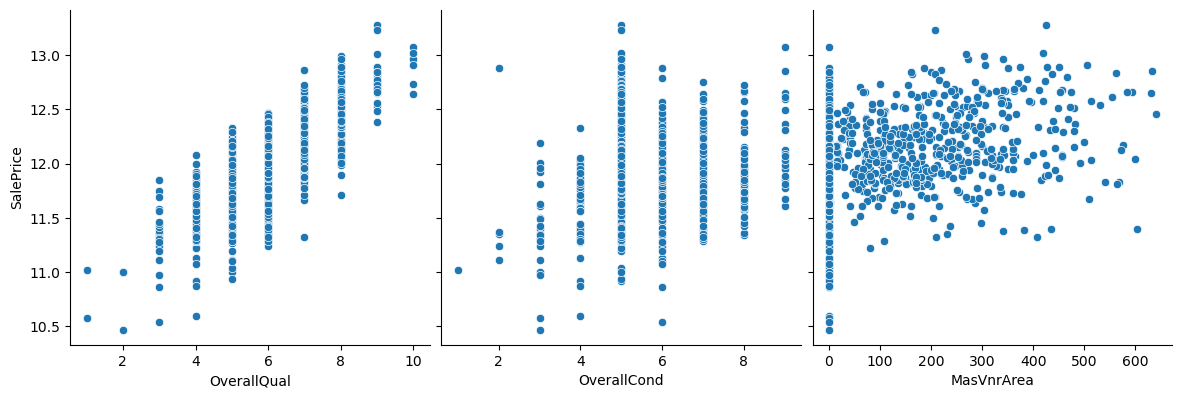

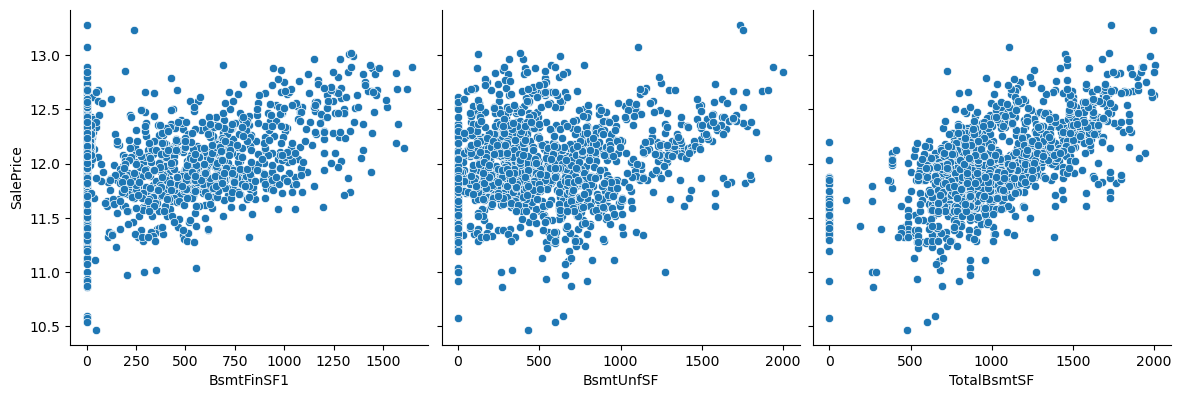

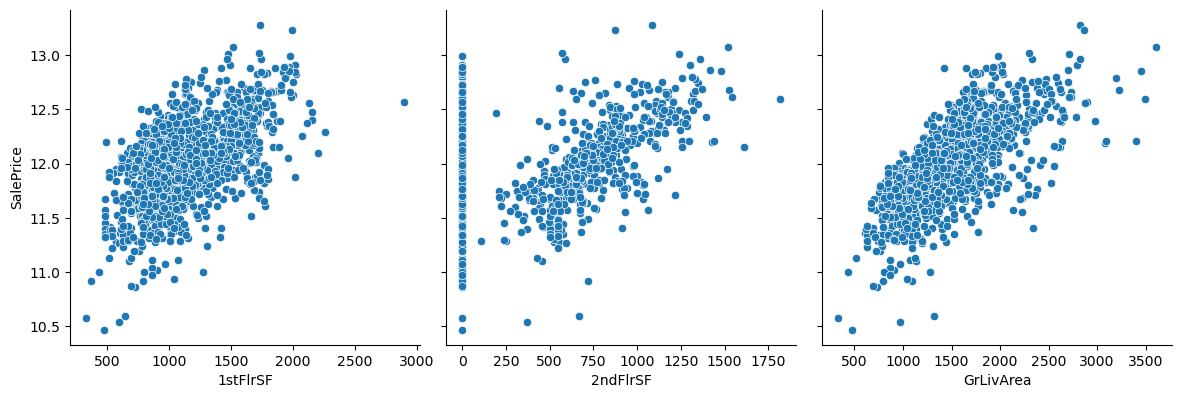

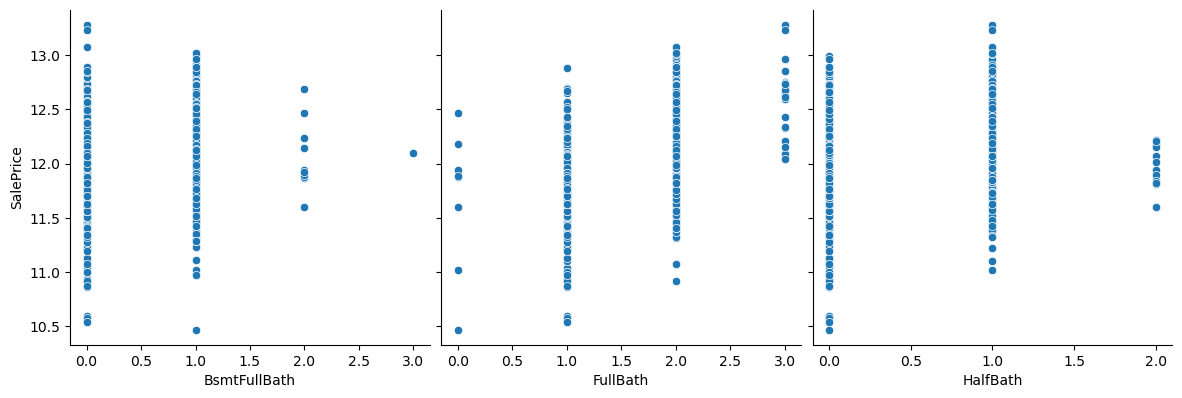

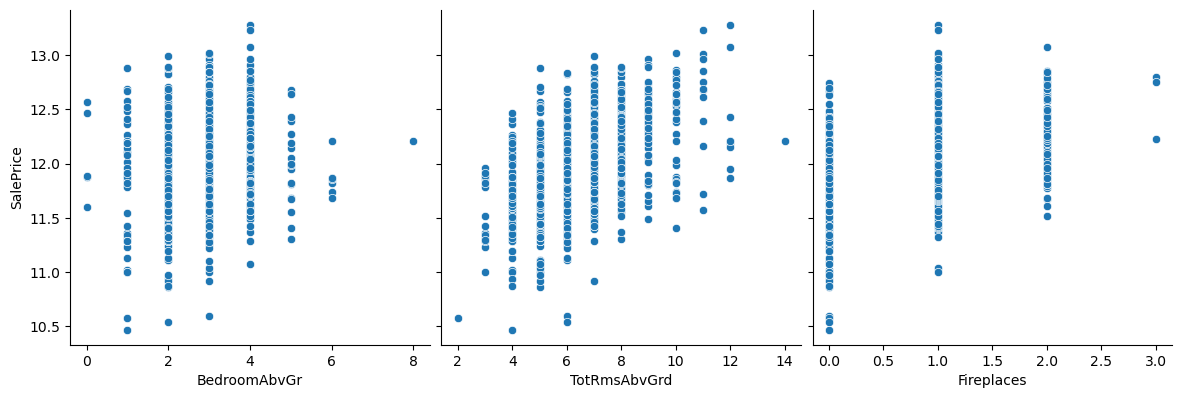

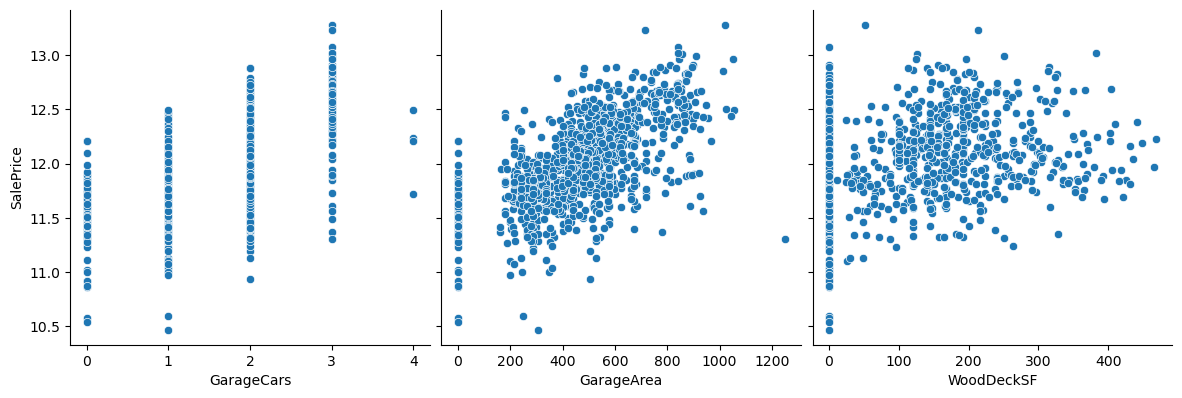

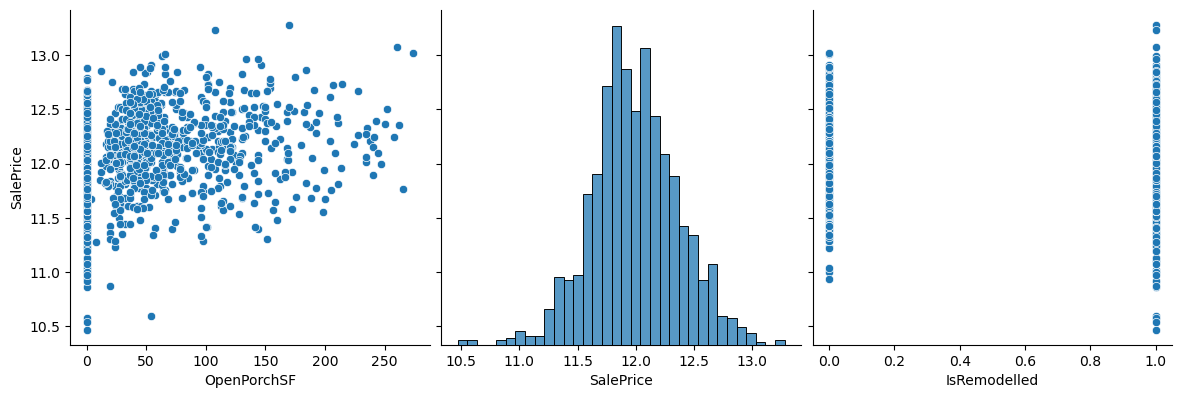

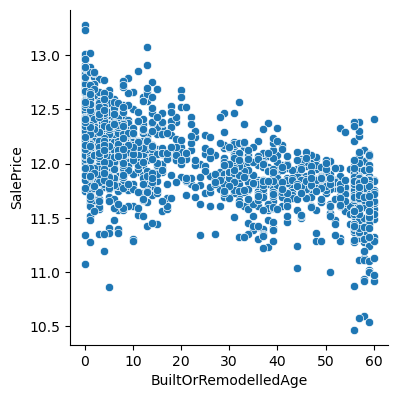

In [28]:
#Checking the numerical attributes using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4)
sns.pairplot(data, x_vars=['BuiltOrRemodelledAge'], y_vars='SalePrice',height=4)
plt.show()

#### Observation:
-  1stFlrSF, GrLivArea is showing Correlation with target variable.
-  Rest of the variables are too scattered will require further analysis to understand.

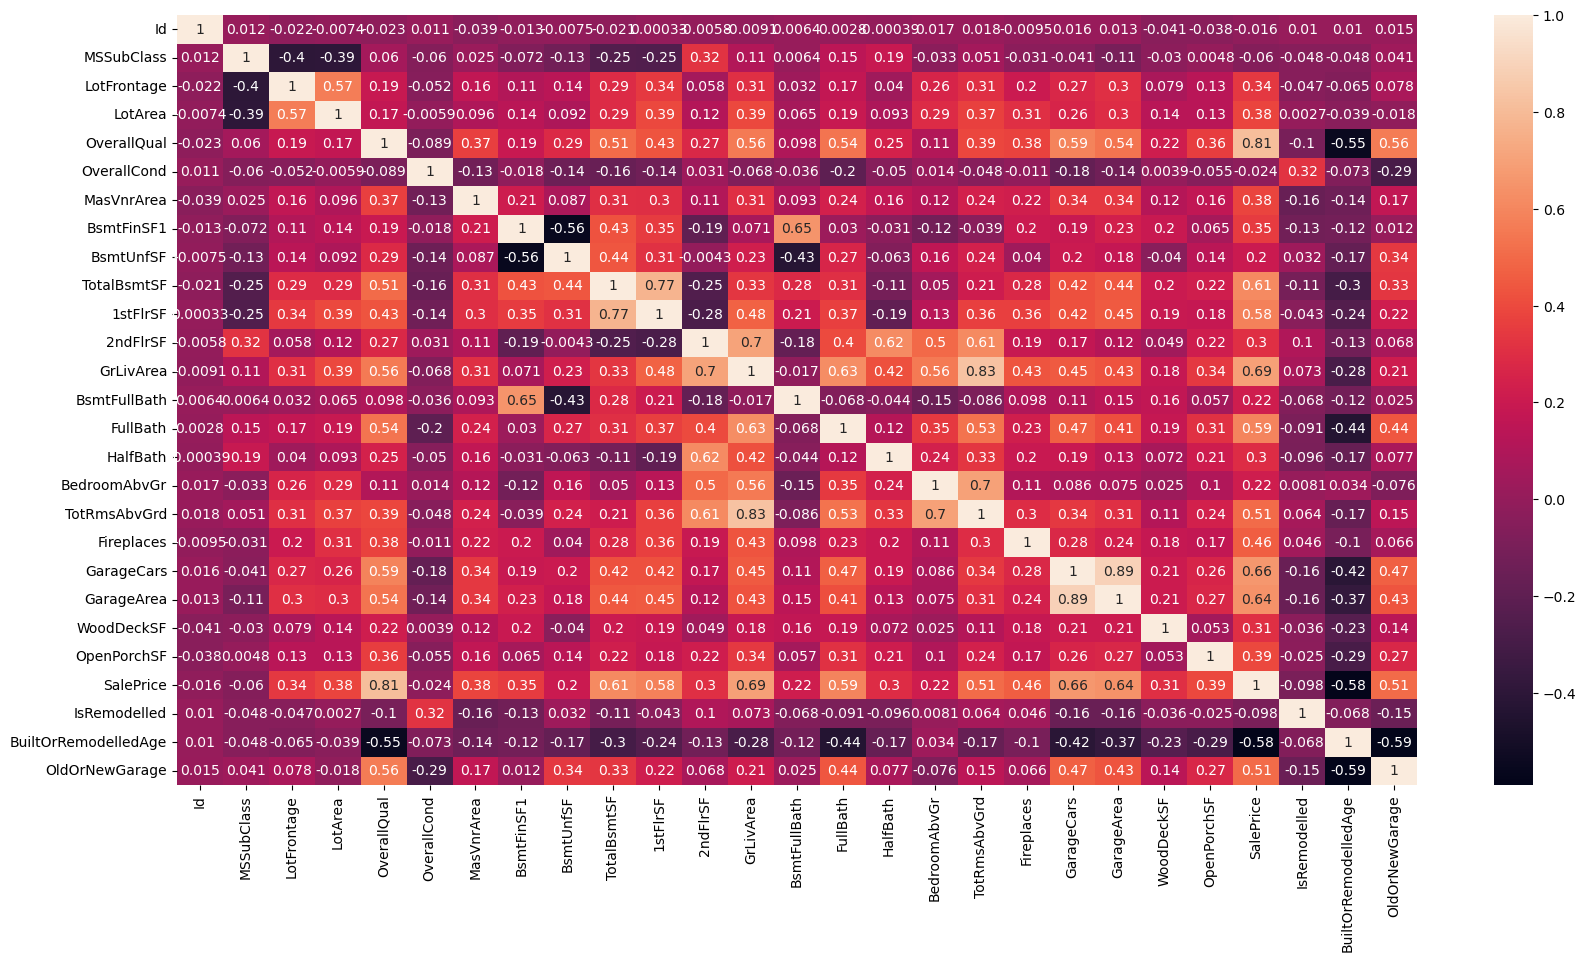

In [29]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

#### Removing Columns which show high Correlation.
-  TotRmsAbvGrd and GrLivArea show 83%.
-  Garage Area and Garage Cars show 89%.

In [30]:
# Removing the highly correlated variables

data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [31]:
data.shape

(1358, 47)

# Step 4 : Data Preparation.

-  Converting Categorical data into Numerical data.
-  Creating Dummies.

In [32]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['d_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['d_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['d_Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
data['d_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['d_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['d_SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [33]:
# dropping the old columns as we have new derieved column
# id column doesn't seem to be important so dropping the column

data = data.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [34]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, d_GarageType], axis = 1)

data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [35]:
# dropping the old columns as we have new derieved column

data = data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


#### We can see that columns in the dataset are numeric now.

# Step 5 : Train Test Split

In [37]:
# Putting all feature variable to X

X = data.drop(['SalePrice'], axis=1)
X.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [38]:
# Putting response variable to y

y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [39]:
#Scaling

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [40]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# Step 6 : Recursive Feature Elimination

Since we are left with 111 features we will use RFE to reduce features down to 50 and do our further analysis.

In [41]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [42]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

data_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
data_df = data_df.loc[data_df['rfe_support'] == True]
data_df.reset_index(drop=True, inplace=True)

data_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [43]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [44]:
X_train_rfe1 = pd.DataFrame(X_train[col])


In [45]:
X_train_rfe1.head()


,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_CarPort
328,-1.151909,0.740183,-0.526853,1.623717,1.152606,0.957298,-0.797204,-0.033260,1.157858,-1.008133,...,2.550051,-0.201527,-0.134131,-0.733443,2.574726,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
1042,1.214461,-0.775908,0.365250,-1.013304,-1.283688,-0.312979,0.582715,0.284106,-0.800263,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
318,0.820250,-0.017863,1.257352,0.412442,0.522348,0.257470,-0.797204,-0.543619,-0.800263,-1.008133,...,2.550051,-0.201527,-0.134131,-0.733443,2.574726,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
1050,-1.590935,0.740183,-0.526853,-1.013304,0.940755,1.257225,-0.797204,0.185465,-0.800263,0.841927,...,-0.392149,-0.201527,-0.134131,1.363432,-0.388391,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
83,-0.266941,-2.292000,-3.203159,-1.013304,-0.012578,-0.336503,-0.797204,0.123279,-0.800263,-1.008133,...,-0.392149,-0.201527,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168


In [46]:
X_train_rfe1.shape


(950, 50)

In [47]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9232427134171672

In [48]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9009427408981627

In [49]:
X_train_rfe = X_train[col]

In [50]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

# Step 6 : Model Building and Evaluation.

## Ridge Regression

In [51]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.077867,-0.084073,1
17,6.0,-0.077918,-0.084087,2
18,7.0,-0.077966,-0.084102,3
15,4.0,-0.077818,-0.084102,4
19,8.0,-0.078013,-0.084114,5
20,9.0,-0.078056,-0.084125,6
21,10.0,-0.078096,-0.084138,7
14,3.0,-0.077771,-0.084184,8
22,20,-0.078416,-0.084255,9
13,2.0,-0.077729,-0.084283,10


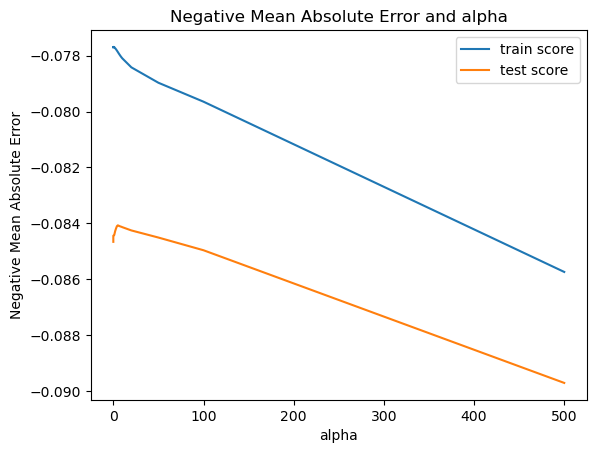

In [53]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [54]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [55]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02230328,  0.06781976,  0.04560507,  0.03246279,  0.04514277,
        0.01443   ,  0.00927222,  0.08855527,  0.01183694,  0.01100282,
        0.01998561,  0.02135318,  0.03642235,  0.01014358, -0.01250822,
       -0.01811553,  0.01376195,  0.01456923,  0.01667056,  0.0183382 ,
        0.0163361 ,  0.01459524, -0.01854577,  0.01453371,  0.06777694,
        0.02722226,  0.10489287,  0.07542535,  0.02596579, -0.01140253,
       -0.00856186,  0.02266905, -0.01509615, -0.00966145,  0.01707021,
       -0.00955568, -0.0133837 , -0.00516625,  0.01233852, -0.04168168,
       -0.03218332,  0.01206437, -0.01686973,  0.03597018,  0.02075844,
        0.02167383,  0.04308288,  0.01773666,  0.00692126, -0.0094755 ])

In [56]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013710783577351116

In [57]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0223
1,OverallQual,0.0678
2,OverallCond,0.0456
3,BsmtFinSF1,0.0325
4,TotalBsmtSF,0.0451
5,1stFlrSF,0.0144
6,2ndFlrSF,0.0093
7,GrLivArea,0.0886
8,BsmtFullBath,0.0118
9,FullBath,0.0110


In [58]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0223,
 'OverallQual': 0.0678,
 'OverallCond': 0.0456,
 'BsmtFinSF1': 0.0325,
 'TotalBsmtSF': 0.0451,
 '1stFlrSF': 0.0144,
 '2ndFlrSF': 0.0093,
 'GrLivArea': 0.0886,
 'BsmtFullBath': 0.0118,
 'FullBath': 0.011,
 'HalfBath': 0.02,
 'Fireplaces': 0.0214,
 'GarageCars': 0.0364,
 'WoodDeckSF': 0.0101,
 'IsRemodelled': -0.0125,
 'BuiltOrRemodelledAge': -0.0181,
 'OldOrNewGarage': 0.0138,
 'd_BsmtQual': 0.0146,
 'd_BsmtExposure': 0.0167,
 'd_HeatingQC': 0.0183,
 'd_KitchenQual': 0.0163,
 'd_GarageFinish': 0.0146,
 'd_BldgType': -0.0185,
 'd_SaleCondition': 0.0145,
 'MSZoning_FV': 0.0678,
 'MSZoning_RH': 0.0272,
 'MSZoning_RL': 0.1049,
 'MSZoning_RM': 0.0754,
 'Neighborhood_Crawfor': 0.026,
 'Neighborhood_Edwards': -0.0114,
 'Neighborhood_MeadowV': -0.0086,
 'Neighborhood_NridgHt': 0.0227,
 'Neighborhood_OldTown': -0.0151,
 'Neighborhood_SWISU': -0.0097,
 'Neighborhood_StoneBr': 0.0171,
 'Exterior1st_BrkComm': -0.0096,
 'Exterior1st_CemntBd': -0.0134,
 'Exterior1st_Plywood': -0.0

#### RFE

In [59]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [60]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

data_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
data_df = data_df.loc[data_df['rfe_support'] == True]
data_df.reset_index(drop=True, inplace=True)

data_df['Coefficient'] = data_df['Features'].apply(find)
data_df = data_df.sort_values(by=['Coefficient'], ascending=False)
data_df = data_df.head(15)
data_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1049
5,GrLivArea,True,1,0.0886
11,MSZoning_RM,True,1,0.0754
1,OverallQual,True,1,0.0678
9,MSZoning_FV,True,1,0.0678
2,OverallCond,True,1,0.0456
4,TotalBsmtSF,True,1,0.0451
14,Foundation_PConc,True,1,0.0431
7,GarageCars,True,1,0.0364
3,BsmtFinSF1,True,1,0.0325


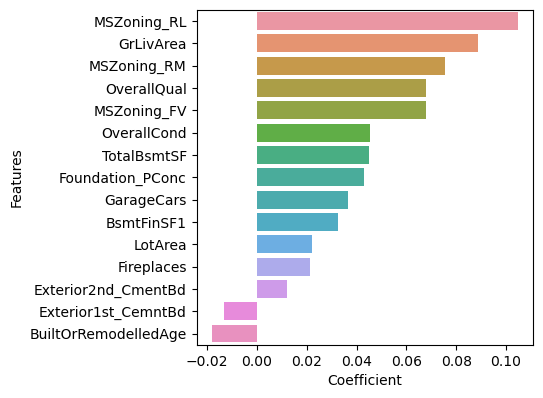

In [86]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,4,4)
sns.barplot(y = 'Features', x = 'Coefficient', data = data_df)
plt.show()

In [62]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9189981831035777


The above graph displays the top 15 variables based on the Ridge Regression model that are significant in predicting the price of a house.

## Lasso Regression

In [63]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.077930,-0.084263,1
4,0.0005,-0.078041,-0.084274,2
2,0.0003,-0.077841,-0.084319,3
1,0.0002,-0.077770,-0.084395,4
0,0.0001,-0.077709,-0.084488,5
5,0.001,-0.078717,-0.084782,6
6,0.002,-0.079584,-0.085324,7
7,0.003,-0.080123,-0.085672,8
8,0.004,-0.080606,-0.086078,9
9,0.005,-0.081188,-0.086506,10


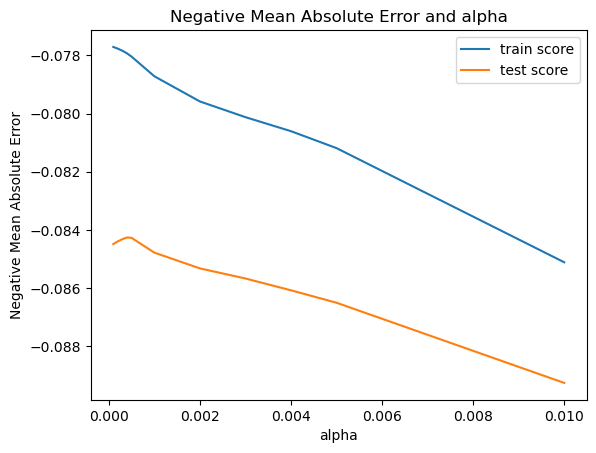

In [88]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [66]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [67]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.0219477 ,  0.06950135,  0.04537928,  0.03286372,  0.04577466,
        0.00611123, -0.        ,  0.0998619 ,  0.01101981,  0.00943301,
        0.01898491,  0.02119659,  0.03689155,  0.00992809, -0.0121443 ,
       -0.01830826,  0.013156  ,  0.01345448,  0.01664257,  0.01785536,
        0.01613982,  0.01481986, -0.01797241,  0.01447809,  0.06867471,
        0.02715573,  0.10707477,  0.07582037,  0.02534044, -0.01093994,
       -0.00819895,  0.0217776 , -0.01485445, -0.00977658,  0.01612126,
       -0.00934986, -0.00035995, -0.00467573,  0.01164387, -0.03151998,
       -0.02982943,  0.        , -0.01607397,  0.02642347,  0.01799128,
        0.01939112,  0.04140751,  0.01653636,  0.00632644, -0.00895779])

In [68]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013535752335222997

In [69]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0219
1,OverallQual,0.0695
2,OverallCond,0.0454
3,BsmtFinSF1,0.0329
4,TotalBsmtSF,0.0458
5,1stFlrSF,0.0061
6,GrLivArea,0.0999
7,BsmtFullBath,0.0110
8,FullBath,0.0094
9,HalfBath,0.0190


In [70]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.021947703751005913,
 'OverallQual': 0.06950134834645684,
 'OverallCond': 0.04537928153017683,
 'BsmtFinSF1': 0.032863718624673716,
 'TotalBsmtSF': 0.04577465842494208,
 '1stFlrSF': 0.0061112331151755555,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.09986190123179006,
 'BsmtFullBath': 0.011019807358195941,
 'FullBath': 0.009433013813376101,
 'HalfBath': 0.018984908519164245,
 'Fireplaces': 0.021196585613091446,
 'GarageCars': 0.0368915528509935,
 'WoodDeckSF': 0.009928091931572026,
 'IsRemodelled': -0.012144296662570721,
 'BuiltOrRemodelledAge': -0.01830826335009638,
 'OldOrNewGarage': 0.013156001425136033,
 'd_BsmtQual': 0.013454480844421666,
 'd_BsmtExposure': 0.01664257090441491,
 'd_HeatingQC': 0.0178553600159724,
 'd_KitchenQual': 0.01613982396082522,
 'd_GarageFinish': 0.014819859102452097,
 'd_BldgType': -0.017972411441745842,
 'd_SaleCondition': 0.014478086478087314,
 'MSZoning_FV': 0.0686747066010459,
 'MSZoning_RH': 0.02715573365633354,
 'MSZoning_RL': 0.10707476959731287,

RFE

In [89]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [90]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

data_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
data_df = data_df.loc[data_df['rfe_support'] == True]
data_df.reset_index(drop=True, inplace=True)

data_df['Coefficient'] = data_df['Features'].apply(find)
data_df = data_df.sort_values(by=['Coefficient'], ascending=False)
data_df = data_df.head(15)
data_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.107075
5,GrLivArea,True,1,0.099862
12,MSZoning_RM,True,1,0.075820
1,OverallQual,True,1,0.069501
9,MSZoning_FV,True,1,0.068675
4,TotalBsmtSF,True,1,0.045775
2,OverallCond,True,1,0.045379
14,Foundation_PConc,True,1,0.041408
7,GarageCars,True,1,0.036892
3,BsmtFinSF1,True,1,0.032864


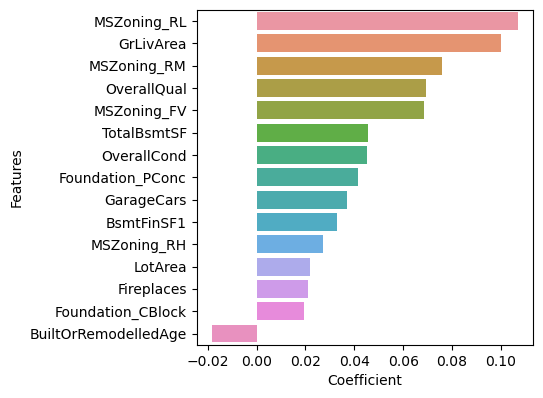

In [92]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,4,4)
sns.barplot(y = 'Features', x = 'Coefficient', data = data_df)
plt.show()

In [93]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9188533706670077


The above graph displays the top 15 variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Conclusion

#### The Optimal Lambda values in case of Ridge and Lasso are:

-  Ridge - 5
-  Lasso - 0.0004

#### The Mean Squared error in case of Ridge and Lasso are:
 
-  Ridge - 0.01371078357735112
-  Lasso - 0.013535752335222997

#### The Mean Squared Error of Lasso is slightly lower than that of Ridge.

#### As we know Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

#### So based on Lasso, the factors that generally affect the price are the 
-  Zoning classification
-  Living area square feet
-  Overall quality and condition of the house
-  Foundation type of the house
-  Number of cars that can be accomodated in the garage
-  Total basement area in square feet and the Basement finished square feet.

#### Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.
